In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Customer.csv',delimiter='\t')

In [4]:
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?,10 What is the operating system (OS) of your device?,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,Delhi,110009,5,4,4,3,5,1,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,1,2,Delhi,110030,5,5,2,1,2,3,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,1,2,Greater Noida,201308,4,5,3,1,4,2,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,0,2,Karnal,132001,4,1,3,1,4,3,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,1,2,Bangalore,530068,3,2,2,1,2,3,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
5,1,3,Noida,201308,5,5,2,1,4,2,...,"Flipkart.com, Paytm.com, Snapdeal.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com",Flipkart.com,Paytm.com,Flipkart.com,Amazon.in,"Amazon.in, Paytm.com"
6,0,4,Delhi,110011,5,4,2,4,5,2,...,"Amazon.in, Flipkart.com, Snapdeal.com",Amazon.in,Myntra.com,Myntra.com,Flipkart.com,Snapdeal.com,Myntra.com,Myntra.com,Snapdeal.com,"Flipkart.com, Paytm.com, Myntra.com, snapdeal.com"
7,0,4,Delhi,110018,4,1,3,3,5,1,...,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com",Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com",Flipkart.com,Amazon.in,Amazon.in,Amazon.in,Amazon.in
8,1,1,Solan,173229,3,1,2,1,4,2,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in
9,1,3,Delhi,110039,1,1,2,2,5,1,...,Paytm.com,"Amazon.in, Flipkart.com",Paytm.com,Paytm.com,Snapdeal.com,Snapdeal.com,Myntra.com,Myntra.com,Flipkart.com,Flipkart.com


In [5]:
df.shape

(269, 71)

In [6]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [7]:
pd.set_option('display.max_columns',None)

In [8]:
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?,10 What is the operating system (OS) of your device?,11 What browser do you run on your device to access the website?,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?,16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?,"17 Why did you abandon the “Bag”, “Shopping Cart”?",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,Delhi,110009,5,4,4,3,5,1,1,1,1,3,4,3,3

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
1Gender of respondent                                                                                                                                                                                             269 non-null int64
2 How old are you?                                                                                                                                                                                                269 non-null int64
3 Which city do you shop online from?                                                                                                                                                                             269 non-null object
4 What is the Pin Code of where you shop online from?                                                                                                                                                          

In [10]:
#lets check the null balues if any
df.isnull().sum()

1Gender of respondent                                                                                                                                                                                                  0
2 How old are you?                                                                                                                                                                                                     0
3 Which city do you shop online from?                                                                                                                                                                                  0
4 What is the Pin Code of where you shop online from?                                                                                                                                                                  0
5 Since How Long You are Shopping Online ?                                                                                          

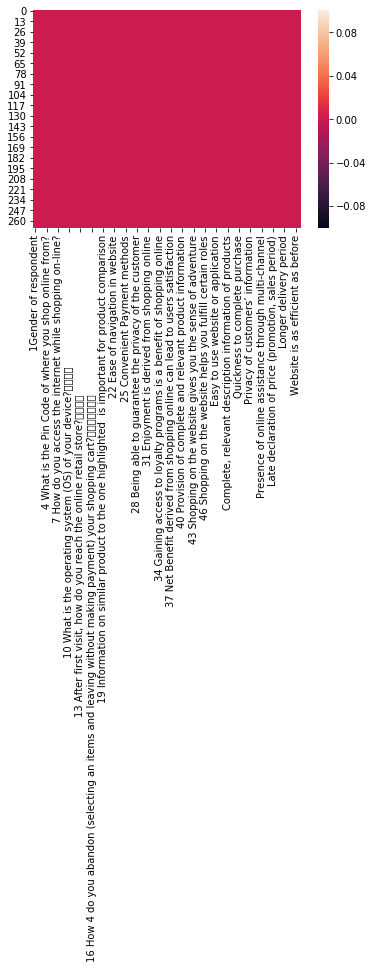

In [11]:
#Lets use heatmap
sns.heatmap(df.isnull())

As we can see there is no null values in the dataset

In [12]:
df.dropna(inplace=True)

In [13]:
df.shape

(269, 71)

In [14]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [15]:
#Normalization
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?,10 What is the operating system (OS) of your device?,11 What browser do you run on your device to access the website?,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?,16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?,"17 Why did you abandon the “Bag”, “Shopping Cart”?",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,Delhi,110009,5,4,4,3,5,1,1,1,1,3,4,3,3

In [23]:
df.describe

<bound method NDFrame.describe of      1Gender of respondent  2 How old are you?   \
0                        0                    3   
1                        1                    2   
2                        1                    2   
3                        0                    2   
4                        1                    2   
5                        1                    3   
6                        0                    4   
7                        0                    4   
8                        1                    1   
9                        1                    3   
10                       0                    3   
11                       1                    4   
12                       1                    5   
13                       1                    3   
14                       1                    2   
15                       1                    2   
16                       0                    3   
17                       0                    4 

In [24]:
#Lets find the correlation matrix
df_cor=df.corr
df_cor

<bound method DataFrame.corr of      1Gender of respondent  2 How old are you?   \
0                        0                    3   
1                        1                    2   
2                        1                    2   
3                        0                    2   
4                        1                    2   
5                        1                    3   
6                        0                    4   
7                        0                    4   
8                        1                    1   
9                        1                    3   
10                       0                    3   
11                       1                    4   
12                       1                    5   
13                       1                    3   
14                       1                    2   
15                       1                    2   
16                       0                    3   
17                       0                    4   

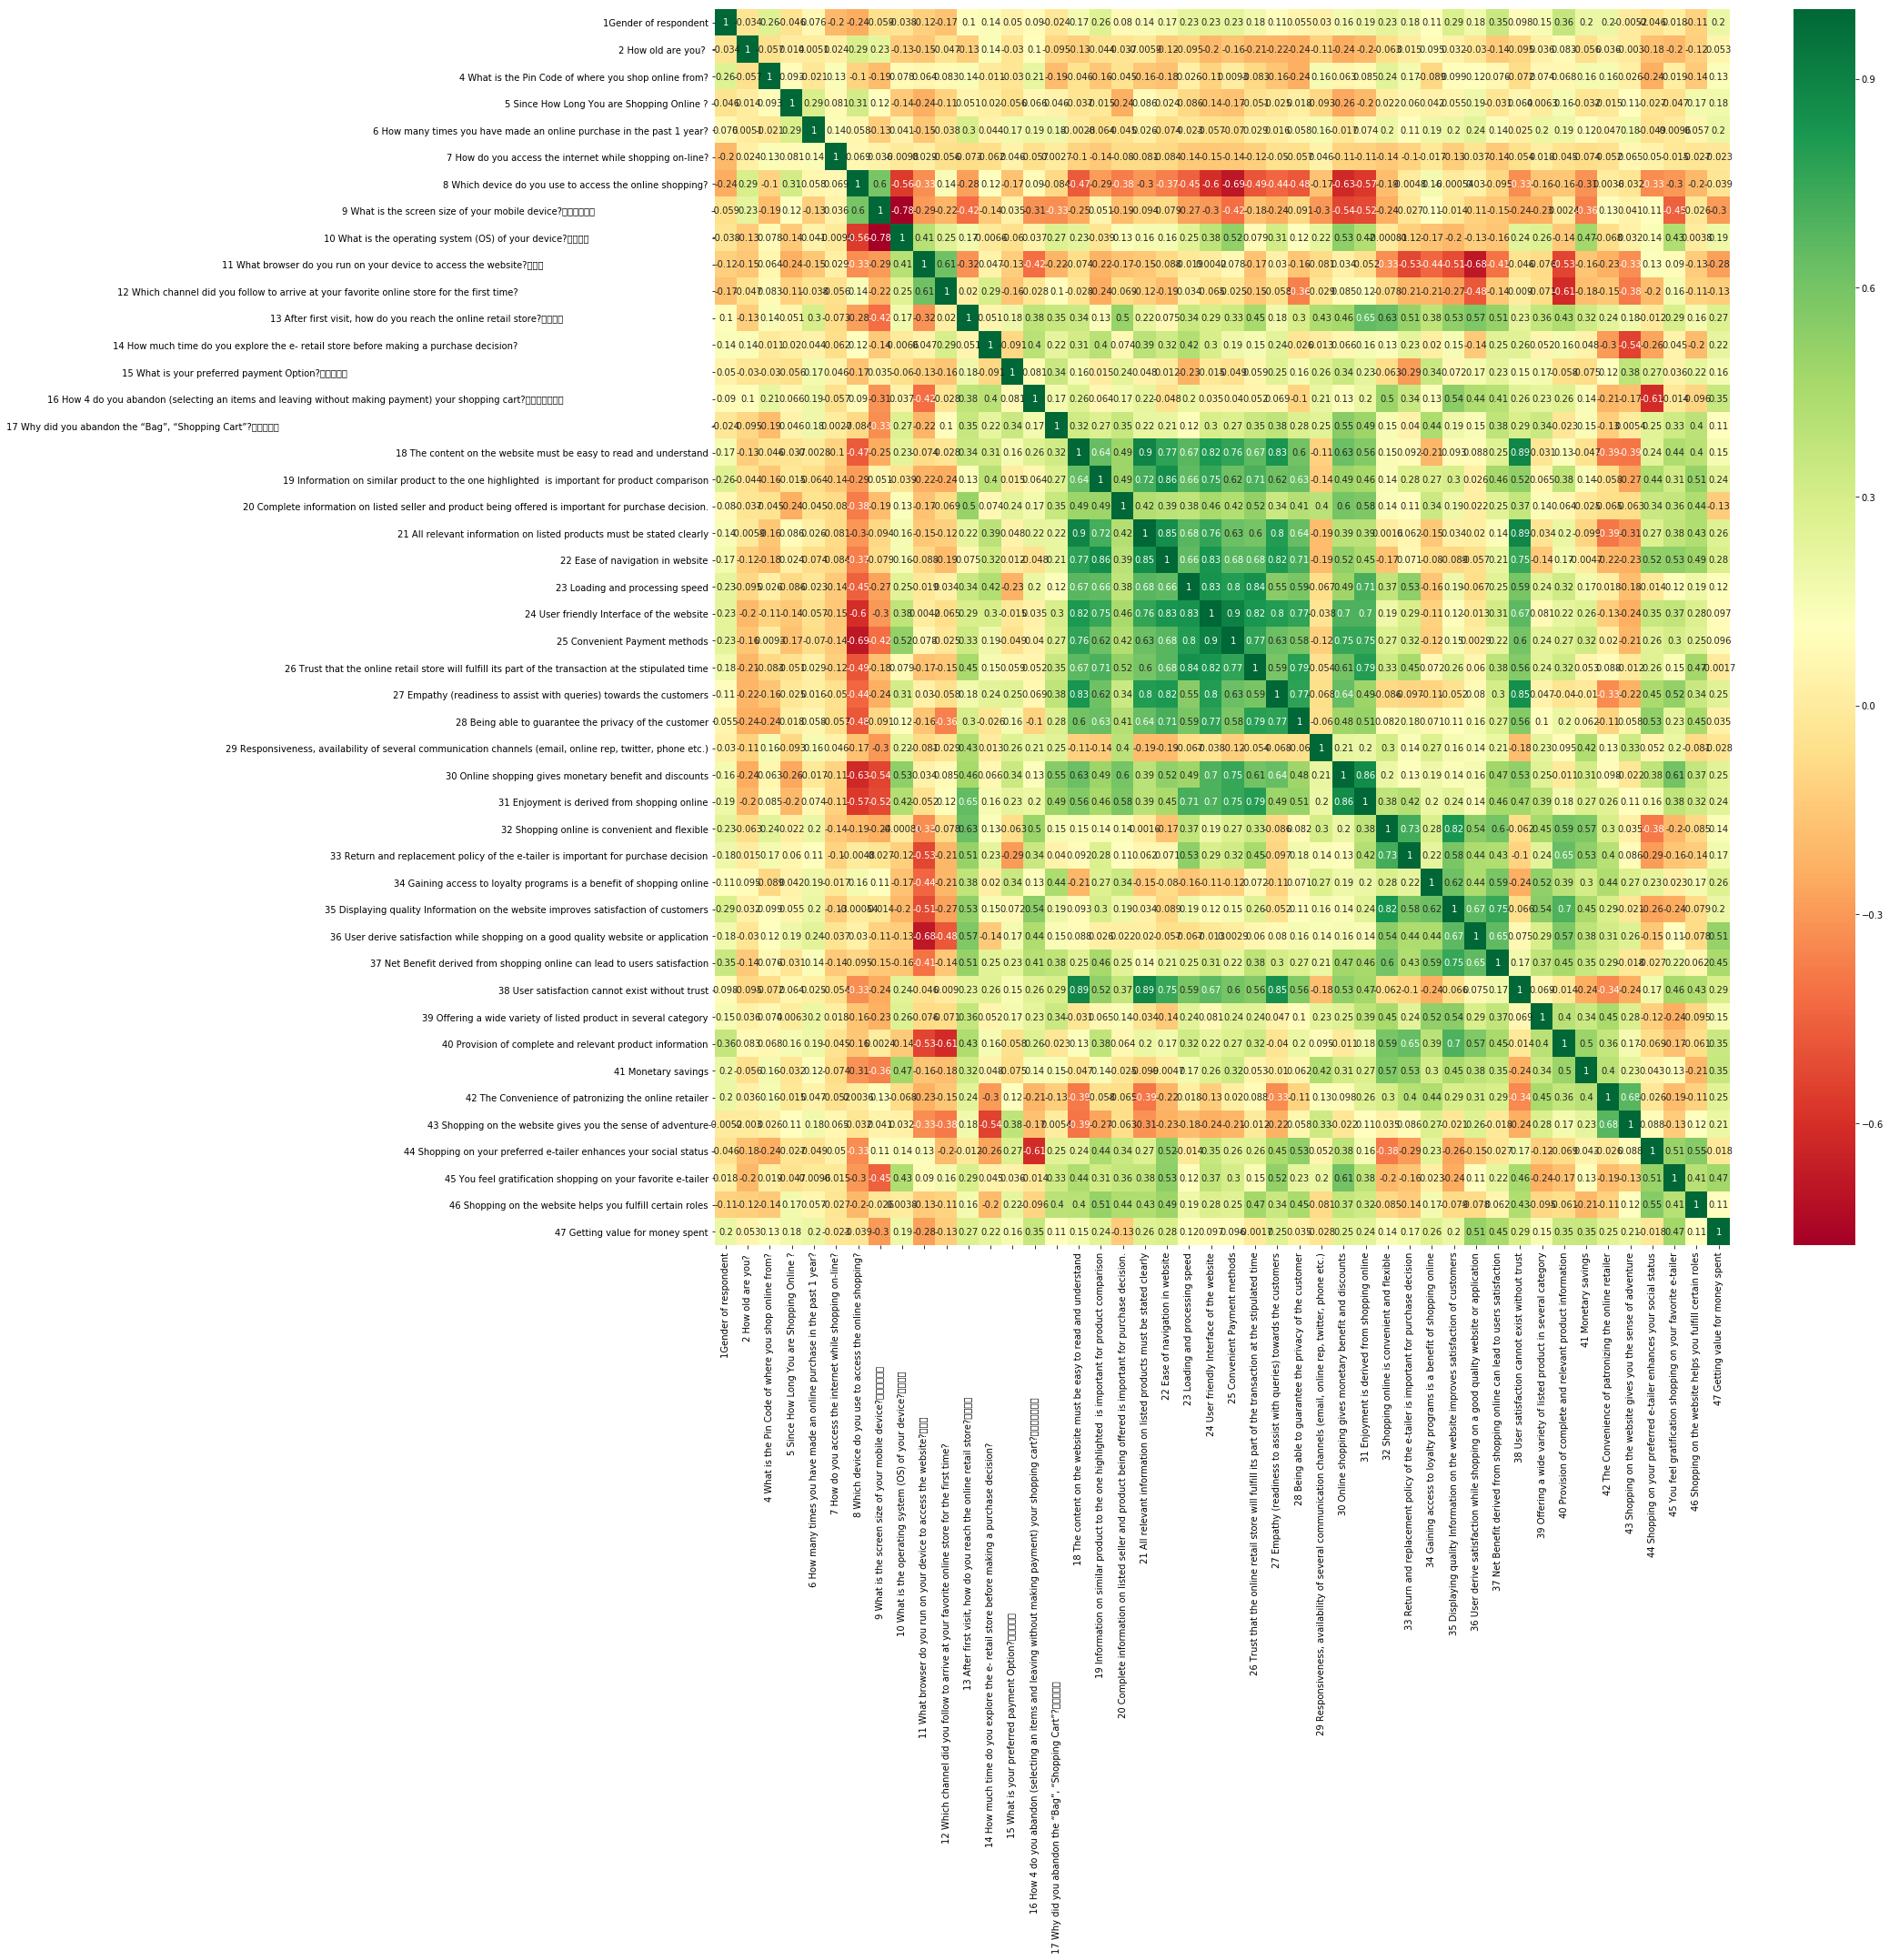

In [29]:
#lets plot heatmap on correlation matrix
plt.figure(figsize = (25,25))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

In [32]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [33]:
X=df.loc[:,['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ',
       '14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ',
       '15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ',
       '16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ',
       '17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ',
       '18 The content on the website must be easy to read and understand',
       '19 Information on similar product to the one highlighted  is important for product comparison',
       '20 Complete information on listed seller and product being offered is important for purchase decision.',
       '21 All relevant information on listed products must be stated clearly',
       '22 Ease of navigation in website', '23 Loading and processing speed',
       '24 User friendly Interface of the website',
       '25 Convenient Payment methods',
       '26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time',
       '27 Empathy (readiness to assist with queries) towards the customers',
       '28 Being able to guarantee the privacy of the customer',
       '29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)',
       '30 Online shopping gives monetary benefit and discounts',
       '31 Enjoyment is derived from shopping online',
       '32 Shopping online is convenient and flexible',
       '33 Return and replacement policy of the e-tailer is important for purchase decision',
       '34 Gaining access to loyalty programs is a benefit of shopping online',
       '35 Displaying quality Information on the website improves satisfaction of customers',
       '36 User derive satisfaction while shopping on a good quality website or application',
       '37 Net Benefit derived from shopping online can lead to users satisfaction',
       '38 User satisfaction cannot exist without trust',
       '39 Offering a wide variety of listed product in several category',
       '40 Provision of complete and relevant product information',
       '41 Monetary savings',
       '42 The Convenience of patronizing the online retailer',
       '43 Shopping on the website gives you the sense of adventure',
       '44 Shopping on your preferred e-tailer enhances your social status',
       '45 You feel gratification shopping on your favorite e-tailer',
       '46 Shopping on the website helps you fulfill certain roles',
       '47 Getting value for money spent',
       'From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ',
       'Easy to use website or application',
       'Visual appealing web-page layout', 'Wild variety of product on offer',
       'Complete, relevant description information of products',
       'Fast loading website speed of website and application',
       'Reliability of the website or application',
       'Quickness to complete purchase',
       'Availability of several payment options', 'Speedy order delivery ',
       'Privacy of customers’ information',
       'Security of customer financial information',
       'Perceived Trustworthiness',
       'Presence of online assistance through multi-channel',
       'Longer time to get logged in (promotion, sales period)',
       'Longer time in displaying graphics and photos (promotion, sales period)',
       'Late declaration of price (promotion, sales period)',
       'Longer page loading time (promotion, sales period)',
       'Limited mode of payment on most products (promotion, sales period)',
       'Longer delivery period', 'Change in website/Application design',
       'Frequent disruption when moving from one page to another',
       'Website is as efficient as before',
       'Which of the Indian online retailer would you recommend to a friend?']]
X.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?,10 What is the operating system (OS) of your device?,11 What browser do you run on your device to access the website?,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?,16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?,"17 Why did you abandon the “Bag”, “Shopping Cart”?",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,Delhi,110009,5,4,4,3,5,1,1,1,1,3,4,3,3

In [34]:
y = df.iloc[:, 1]
y.head()

0    3
1    2
2    2
3    2
4    2
Name: 2 How old are you? , dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [41]:
df.head()

,1Gender of respondent,2 How old are you?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?,10 What is the operating system (OS) of your device?,11 What browser do you run on your device to access the website?,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?,16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?,"17 Why did you abandon the “Bag”, “Shopping Cart”?",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,110009,5,4,4,3,5,1,1,1,1,3,4,3,3,4,3,3,4,4,1,2,2,2,5,4,4,3,1,2,2,4,3,5,4,5,3

#Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)